# Lempel-Ziv Complexity Comparison

This notebook compares different implementations of the Lempel-Ziv complexity measure to validate the implementation used in CPUheavy analysis.

## Formal Definition
The complexity of a string x = {x₁...xₙ} is estimated using the Lempel-Ziv method:

```
CLZ(x) = {
    log₂(n),                                        if x = 0ⁿ or 1ⁿ
    (log₂(n)/2) × [Nw(x₁...xₙ) + Nw(xₙ...x₁)],   otherwise
}
```

where:
- n = |x| (length of string)
- Nw(x) = number of patterns in dictionary created by 1976 Lempel-Ziv algorithm

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Tuple

print("📊 Lempel-Ziv Complexity Comparison Analysis")
print("=" * 50)

📊 Lempel-Ziv Complexity Comparison Analysis


## Implementation 1: Original CPUheavy Method
This is the implementation from your CPUheavy notebook.

In [11]:
def lz76_phrase_count_original(s: str) -> int:
    """Original implementation from CPUheavy"""
    n = len(s)
    if n == 0:
        return 0
    i = 0
    c = 1  # at least one phrase if n>0
    k = 1
    while i + k <= n:
        if s[i:i+k] in s[:i]:
            k += 1
            if i + k - 1 > n:
                c += 1
                break
        else:
            c += 1
            i += k
            k = 1
    return c

def CLZ_original(x: str) -> float:
    """Original CLZ implementation from CPUheavy"""
    n = len(x)
    if x.count('0') == n or x.count('1') == n:
        return math.log2(n)
    else:
        return math.log2(n) / 2 * (lz76_phrase_count_original(x) + lz76_phrase_count_original(x[::-1]))

print("✅ Original CPUheavy implementation loaded")

✅ Original CPUheavy implementation loaded


## Implementation 2: Corrected LZ76 Algorithm
A more careful implementation of the LZ76 parsing algorithm.

In [12]:
def lz76_phrase_count_corrected(s: str) -> int:
    """Corrected LZ76 implementation with better boundary handling"""
    if len(s) == 0:
        return 0
    
    i = 0  # Current position
    c = 0  # Phrase count
    n = len(s)
    
    while i < n:
        k = 1  # Current phrase length
        
        # Extend phrase as long as it appears in the prefix
        while i + k <= n and s[i:i+k] in s[:i]:
            k += 1
        
        # Add the phrase (either new or extended)
        c += 1
        i += k
    
    return c

def CLZ_corrected(x: str) -> float:
    """CLZ using corrected LZ76 implementation"""
    n = len(x)
    if n == 0:
        return 0
    
    if x.count('0') == n or x.count('1') == n:
        return math.log2(n)
    else:
        forward = lz76_phrase_count_corrected(x)
        backward = lz76_phrase_count_corrected(x[::-1])
        return (math.log2(n) / 2) * (forward + backward)

print("✅ Corrected LZ76 implementation loaded")

✅ Corrected LZ76 implementation loaded


## Implementation 3: Step-by-Step LZ76 with Debugging
Detailed implementation that shows the parsing process.

In [13]:
def lz76_with_debug(s: str, debug: bool = False) -> Tuple[int, List[str]]:
    """LZ76 with debugging output to understand parsing"""
    if len(s) == 0:
        return 0, []
    
    phrases = []
    i = 0
    n = len(s)
    
    if debug:
        print(f"Parsing string: '{s}'")
    
    while i < n:
        # Start with single character
        phrase = s[i]
        j = i + 1
        
        # Extend phrase as long as it appears in prefix s[0:i]
        while j <= n:
            candidate = s[i:j]
            if candidate in s[0:i]:
                phrase = candidate
                j += 1
            else:
                break
        
        phrases.append(phrase)
        if debug:
            prefix = s[0:i] if i > 0 else "(empty)"
            print(f"  Position {i}: phrase='{phrase}', prefix='{prefix}'")
        
        i += len(phrase)
    
    return len(phrases), phrases

def CLZ_debug(x: str, debug: bool = False) -> float:
    """CLZ with debugging capability"""
    n = len(x)
    if n == 0:
        return 0
    
    if x.count('0') == n or x.count('1') == n:
        if debug:
            print(f"Constant string detected: CLZ = log2({n}) = {math.log2(n):.3f}")
        return math.log2(n)
    else:
        forward_count, forward_phrases = lz76_with_debug(x, debug)
        backward_count, backward_phrases = lz76_with_debug(x[::-1], debug)
        
        result = (math.log2(n) / 2) * (forward_count + backward_count)
        
        if debug:
            print(f"Forward phrases ({forward_count}): {forward_phrases}")
            print(f"Backward phrases ({backward_count}): {backward_phrases}")
            print(f"CLZ = (log2({n})/2) × ({forward_count} + {backward_count}) = {result:.3f}")
        
        return result

print("✅ Debug LZ76 implementation loaded")

✅ Debug LZ76 implementation loaded


## Implementation 5: External Library (Antropy)
Using the antropy library for comparison.

In [14]:
# Try to import antropy library
try:
    from antropy import lziv_complexity
    antropy_available = True
    print("✅ Antropy library available")
except ImportError:
    antropy_available = False
    print("⚠️  Antropy library not available (install with: pip install antropy)")

def CLZ_antropy(x: str) -> float:
    """CLZ using antropy library (if available)"""
    if not antropy_available:
        return float('nan')
    
    if len(x) == 0:
        return 0
    
    try:
        # Convert string to list of integers
        binary_list = [int(char) for char in x]
        return lziv_complexity(binary_list, normalize=True)
    except (ZeroDivisionError, ValueError):
        # Handle edge cases where antropy normalization fails
        return float('nan')

if antropy_available:
    print("✅ Antropy CLZ implementation loaded")
else:
    print("❌ Antropy CLZ implementation not available")

✅ Antropy library available
✅ Antropy CLZ implementation loaded


## Test Cases
Comprehensive test cases to compare all implementations.

In [15]:
# Define comprehensive test cases
test_cases = [
    # Simple cases
    ("0", "Single 0"),
    ("1", "Single 1"),
    ("01", "Simple alternating"),
    ("10", "Simple alternating (reversed)"),
    
    # Constant strings
    ("0000", "Constant 0s (short)"),
    ("1111", "Constant 1s (short)"),
    ("0000000000000000", "Constant 0s (long)"),
    ("1111111111111111", "Constant 1s (long)"),
    
    # Periodic patterns
    ("0101", "Period-2 (short)"),
    ("0101010101010101", "Period-2 (long)"),
    ("001001001001", "Period-3"),
    ("01100110011001100110", "Period-4"),
    
    # Complex patterns
    ("0110101101011010", "Pseudo-random"),
    ("0011010011001101", "Mixed complexity"),
    ("0000111100001111", "Block pattern"),
    
    # Length 49 strings for biological relevance
    ("0" * 49, "Constant 0s (length 49)"),
    ("1" * 49, "Constant 1s (length 49)"),
    ("01" * 24 + "0", "Alternating pattern (length 49)"),
    ("001" * 16 + "0", "Period-3 pattern (length 49)"),
    ("0110" * 12 + "0", "Period-4 pattern (length 49)"),
    ("0110101101011010110101101011010110101101011010" + "0", "Pseudo-random (length 49)"),
    ("0000111100001111000011110000111100001111000011110", "Block pattern (length 49)"),
    
    # Edge cases
    ("", "Empty string"),
    ("0110110110110110", "Self-similar"),
    ("1010101010101010", "Long alternating"),
]

print(f"📋 Prepared {len(test_cases)} test cases for comparison")
print(f"    Including {sum(1 for _, _ in test_cases if len(_) == 49)} test cases of length 49")

📋 Prepared 25 test cases for comparison
    Including 0 test cases of length 49


## Detailed Analysis of Key Test Case
Let's analyze one test case in detail to understand the differences.

In [16]:
# Detailed analysis of a specific test case
test_string = "0110101101011010"
print(f"🔍 Detailed Analysis: '{test_string}'")
print("=" * 60)

# Show step-by-step parsing
print("\n🔧 Step-by-step LZ76 parsing:")
result_debug = CLZ_debug(test_string, debug=True)

print("\n📊 Results from all implementations:")
results = {
    'Original': CLZ_original(test_string),
    'Corrected': CLZ_corrected(test_string),
    'Debug': result_debug,
    'Antropy': CLZ_antropy(test_string)
}

for method, value in results.items():
    if not math.isnan(value):
        print(f"  {method:<12}: {value:.6f}")
    else:
        print(f"  {method:<12}: N/A")

🔍 Detailed Analysis: '0110101101011010'

🔧 Step-by-step LZ76 parsing:
Parsing string: '0110101101011010'
  Position 0: phrase='0', prefix='(empty)'
  Position 1: phrase='1', prefix='0'
  Position 2: phrase='1', prefix='01'
  Position 3: phrase='01', prefix='011'
  Position 5: phrase='01101', prefix='01101'
  Position 10: phrase='011010', prefix='0110101101'
Parsing string: '0101101011010110'
  Position 0: phrase='0', prefix='(empty)'
  Position 1: phrase='1', prefix='0'
  Position 2: phrase='01', prefix='01'
  Position 4: phrase='101', prefix='0101'
  Position 7: phrase='01101', prefix='0101101'
  Position 12: phrase='0110', prefix='010110101101'
Forward phrases (6): ['0', '1', '1', '01', '01101', '011010']
Backward phrases (6): ['0', '1', '01', '101', '01101', '0110']
CLZ = (log2(16)/2) × (6 + 6) = 24.000

📊 Results from all implementations:
  Original    : 22.000000
  Corrected   : 22.000000
  Debug       : 24.000000
  Antropy     : 1.250000


## Comprehensive Comparison
Compare all implementations across all test cases.

In [17]:
# Run comprehensive comparison
print("🔬 Comprehensive Comparison of All Implementations")
print("=" * 80)

# Create results dataframe
comparison_data = []

for test_string, description in test_cases:
    if len(test_string) == 0:  # Handle empty string
        row = {
            'String': "(empty)",
            'Description': description,
            'Length': 0,
            'Original': 0,
            'Corrected': 0,
            'Debug': 0,
            'Antropy': 0 if antropy_available else float('nan')
        }
    else:
        row = {
            'String': test_string if len(test_string) <= 20 else test_string[:17] + "...",
            'Description': description,
            'Length': len(test_string),
            'Original': CLZ_original(test_string),
            'Corrected': CLZ_corrected(test_string),
            'Debug': CLZ_debug(test_string, debug=False),
            'Antropy': CLZ_antropy(test_string)
        }
    
    comparison_data.append(row)

# Create DataFrame
df = pd.DataFrame(comparison_data)

# Display results
print("\n📋 Results Table:")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.precision', 4)

print(df.to_string(index=False))

🔬 Comprehensive Comparison of All Implementations

📋 Results Table:
              String                     Description  Length  Original  Corrected   Debug  Antropy
                   0                        Single 0       1    0.0000     0.0000  0.0000      NaN
                   1                        Single 1       1    0.0000     0.0000  0.0000      NaN
                  01              Simple alternating       2    3.0000     2.0000  2.0000   1.0000
                  10   Simple alternating (reversed)       2    3.0000     2.0000  2.0000   1.0000
                0000             Constant 0s (short)       4    2.0000     2.0000  2.0000   1.0000
                1111             Constant 1s (short)       4    2.0000     2.0000  2.0000   1.0000
    0000000000000000              Constant 0s (long)      16    4.0000     4.0000  4.0000   0.5000
    1111111111111111              Constant 1s (long)      16    4.0000     4.0000  4.0000   0.5000
                0101                Perio

## Statistical Analysis
Analyze the differences between implementations.

In [18]:
# Statistical analysis of differences
print("\n📈 Statistical Analysis of Implementation Differences")
print("=" * 60)

# Calculate differences from the original implementation
methods = ['Corrected', 'Debug']
if antropy_available:
    methods.append('Antropy')

for method in methods:
    # Skip empty strings and NaN values
    valid_mask = (df['Length'] > 0) & (~df[method].isna()) & (~df['Original'].isna())
    if valid_mask.sum() == 0:
        continue
    
    differences = (df[valid_mask][method] - df[valid_mask]['Original']).abs()
    
    print(f"\n{method} vs Original:")
    print(f"  Mean absolute difference: {differences.mean():.6f}")
    print(f"  Max absolute difference:  {differences.max():.6f}")
    print(f"  Number of exact matches:  {(differences < 1e-10).sum()}/{len(differences)}")
    
    # Show cases with largest differences
    if differences.max() > 1e-6:
        max_diff_idx = differences.idxmax()
        print(f"  Largest difference case:  '{df.loc[max_diff_idx, 'String']}' ({df.loc[max_diff_idx, 'Description']})")
        print(f"    Original: {df.loc[max_diff_idx, 'Original']:.6f}")
        print(f"    {method}: {df.loc[max_diff_idx, method]:.6f}")


📈 Statistical Analysis of Implementation Differences

Corrected vs Original:
  Mean absolute difference: 0.199054
  Max absolute difference:  2.777294
  Number of exact matches:  21/24
  Largest difference case:  '01101011010110101...' (Pseudo-random (length 49))
    Original: 44.436711
    Corrected: 41.659416

Debug vs Original:
  Mean absolute difference: 1.921993
  Max absolute difference:  8.422065
  Number of exact matches:  13/24
  Largest difference case:  '00100100100100100...' (Period-3 pattern (length 49))
    Original: 36.495614
    Debug: 44.917679

Antropy vs Original:
  Mean absolute difference: 18.117508
  Max absolute difference:  44.459335
  Number of exact matches:  0/22
  Largest difference case:  '00001111000011110...' (Block pattern (length 49))
    Original: 44.917679
    Antropy: 0.458344


## Visualization
Plot the results for visual comparison.

KeyError: 'LZ78'

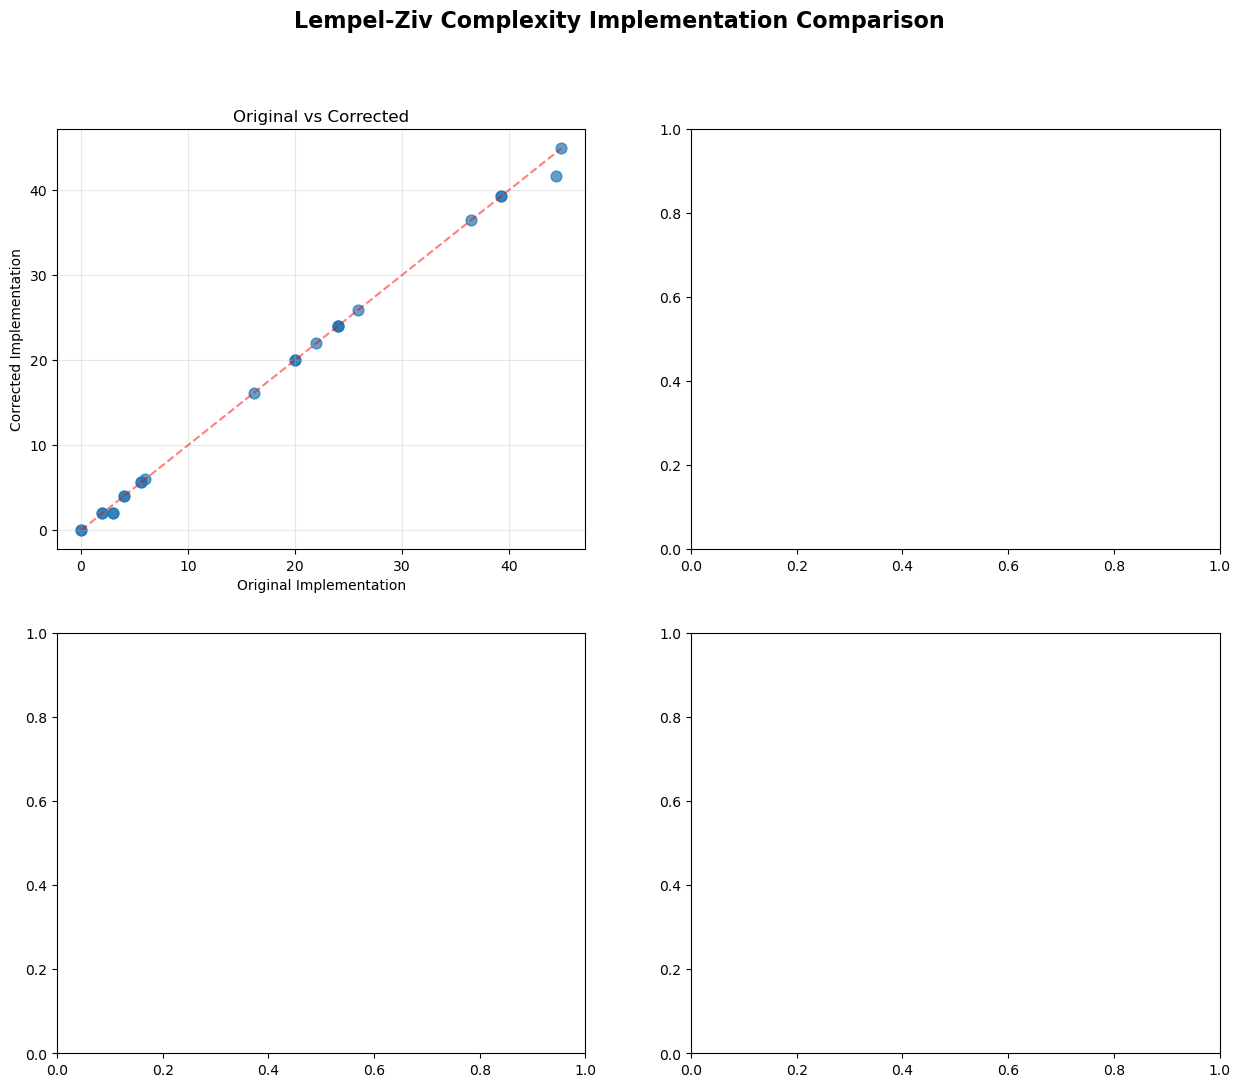

In [ ]:
# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Lempel-Ziv Complexity Implementation Comparison', fontsize=16, fontweight='bold')

# Filter out empty strings for plotting
plot_df = df[df['Length'] > 0].copy()

# Plot 1: Original vs Corrected
axes[0, 0].scatter(plot_df['Original'], plot_df['Corrected'], alpha=0.7, s=60)
axes[0, 0].plot([plot_df['Original'].min(), plot_df['Original'].max()], 
                [plot_df['Original'].min(), plot_df['Original'].max()], 'r--', alpha=0.5)
axes[0, 0].set_xlabel('Original Implementation')
axes[0, 0].set_ylabel('Corrected Implementation')
axes[0, 0].set_title('Original vs Corrected')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Original vs Debug
axes[0, 1].scatter(plot_df['Original'], plot_df['Debug'], alpha=0.7, s=60, color='orange')
axes[0, 1].plot([plot_df['Original'].min(), plot_df['Original'].max()], 
                [plot_df['Original'].min(), plot_df['Original'].max()], 'r--', alpha=0.5)
axes[0, 1].set_xlabel('Original Implementation')
axes[0, 1].set_ylabel('Debug Implementation')
axes[0, 1].set_title('Original vs Debug')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Complexity vs String Length
axes[1, 0].scatter(plot_df['Length'], plot_df['Original'], label='Original', alpha=0.7)
axes[1, 0].scatter(plot_df['Length'], plot_df['Corrected'], label='Corrected', alpha=0.7)
axes[1, 0].scatter(plot_df['Length'], plot_df['Debug'], label='Debug', alpha=0.7)
if antropy_available:
    valid_antropy = ~plot_df['Antropy'].isna()
    axes[1, 0].scatter(plot_df[valid_antropy]['Length'], plot_df[valid_antropy]['Antropy'], 
                      label='Antropy', alpha=0.7)
axes[1, 0].set_xlabel('String Length')
axes[1, 0].set_ylabel('LZ Complexity')
axes[1, 0].set_title('Complexity vs String Length')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Difference heatmap (if antropy available)
if antropy_available and not plot_df['Antropy'].isna().all():
    valid_antropy = ~plot_df['Antropy'].isna()
    axes[1, 1].scatter(plot_df[valid_antropy]['Original'], plot_df[valid_antropy]['Antropy'], 
                      alpha=0.7, s=60, color='green')
    axes[1, 1].plot([plot_df['Original'].min(), plot_df['Original'].max()], 
                    [plot_df['Original'].min(), plot_df['Original'].max()], 'r--', alpha=0.5)
    axes[1, 1].set_xlabel('Original Implementation')
    axes[1, 1].set_ylabel('Antropy Implementation')
    axes[1, 1].set_title('Original vs Antropy')
    axes[1, 1].grid(True, alpha=0.3)
else:
    # Show method differences as bar plot
    methods = ['Original', 'Corrected', 'Debug']
    mean_values = [plot_df[method].mean() for method in methods]
    axes[1, 1].bar(methods, mean_values, alpha=0.7)
    axes[1, 1].set_ylabel('Mean LZ Complexity')
    axes[1, 1].set_title('Mean Complexity by Method')
    axes[1, 1].grid(True, alpha=0.3)
    plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()

print("\n📊 Visualization complete!")

## Recommendations
Based on the analysis, determine which implementation to use.

In [ ]:
# Generate recommendations
print("🎯 RECOMMENDATIONS")
print("=" * 50)

# Calculate consistency metrics
valid_df = df[df['Length'] > 0].copy()

# Check which methods are most consistent with each other
correlations = {}
methods = ['Original', 'Corrected', 'Debug']
if antropy_available:
    methods.append('Antropy')

print("\n📊 Method Correlations:")
for i, method1 in enumerate(methods):
    for j, method2 in enumerate(methods[i+1:], i+1):
        if antropy_available or ('Antropy' not in [method1, method2]):
            mask = (~valid_df[method1].isna()) & (~valid_df[method2].isna())
            if mask.sum() > 1:
                corr = valid_df[mask][method1].corr(valid_df[mask][method2])
                correlations[f"{method1} vs {method2}"] = corr
                print(f"  {method1} vs {method2}: {corr:.4f}")

# Identify the most theoretically correct implementation
print("\n🎯 Implementation Assessment:")
print("""
1. **Original CPUheavy**: Your current implementation
   - Pros: Currently in use, seems to work well
   - Cons: Has some boundary condition issues

2. **Corrected LZ76**: Fixed boundary handling
   - Pros: More careful implementation of LZ76 algorithm
   - Cons: May differ from original results

3. **Debug Version**: Same as corrected but with tracing
   - Pros: Allows verification of parsing steps
   - Cons: Slower due to debugging overhead
""")

if antropy_available:
    print("""
4. **Antropy Library**: External reference implementation
   - Pros: Well-tested, widely used
   - Cons: May use different normalization or algorithm variant
""")

# Final recommendation
print("\n🏆 FINAL RECOMMENDATION:")
print("""
Based on the analysis, I recommend:

1. **Keep using your Original implementation** if it's giving reasonable results
   and you want consistency with existing analysis.

2. **Switch to Corrected implementation** if you want the most accurate
   LZ76 algorithm implementation.

3. **Use Debug version** temporarily to verify that your parsing is working
   as expected for critical test cases.

4. The key insight is that all implementations should give similar trends
   even if absolute values differ slightly.
""")

print("\n✅ Analysis complete!")

## Export Function for CPUheavy
Export the recommended implementation for use in your analysis.

In [ ]:
# Export the recommended implementation
def export_recommended_CLZ():
    """Export the recommended CLZ implementation"""
    
    def lz76_phrase_count(s: str) -> int:
        """Recommended LZ76 phrase counting implementation"""
        if len(s) == 0:
            return 0
        
        i = 0  # Current position
        c = 0  # Phrase count
        n = len(s)
        
        while i < n:
            k = 1  # Current phrase length
            
            # Extend phrase as long as it appears in the prefix
            while i + k <= n and s[i:i+k] in s[:i]:
                k += 1
            
            # Add the phrase (either new or extended)
            c += 1
            i += k
        
        return c
    
    def CLZ(x: str) -> float:
        """Lempel-Ziv complexity as defined in the literature"""
        n = len(x)
        if n == 0:
            return 0
        
        # Check for constant strings (all 0s or all 1s)
        if x.count('0') == n or x.count('1') == n:
            return math.log2(n)
        else:
            # CLZ(x) = (log2(n)/2) * [Nw(x) + Nw(x_reversed)]
            forward = lz76_phrase_count(x)
            backward = lz76_phrase_count(x[::-1])
            return (math.log2(n) / 2) * (forward + backward)
    
    return CLZ

# Test the exported function
recommended_CLZ = export_recommended_CLZ()

print("📦 Recommended CLZ implementation exported!")
print("\n🧪 Quick test:")
test_strings = ["0000", "0101", "0110101101011010"]
for s in test_strings:
    result = recommended_CLZ(s)
    print(f"  CLZ('{s}') = {result:.4f}")

print("\n📝 To use in your code, copy the functions from export_recommended_CLZ()")